In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

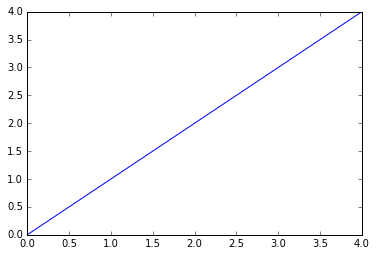

In [2]:
plt.plot(np.arange(5))

In [3]:
df = pd.read_csv("./data/train.csv")

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

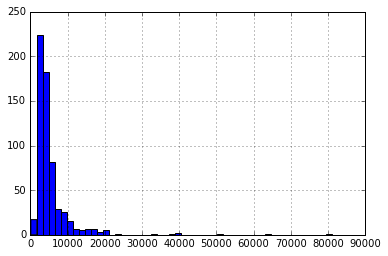

In [8]:
df['ApplicantIncome'].hist(bins=50)

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x117e842b0>],
 'caps': [<matplotlib.lines.Line2D at 0x117e85c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x117dd6dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117dd65c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117e84cc0>,
  <matplotlib.lines.Line2D at 0x117e84dd8>]}

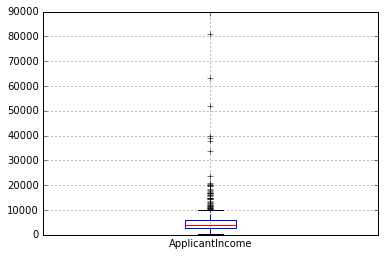

In [9]:
df.boxplot(column='ApplicantIncome')

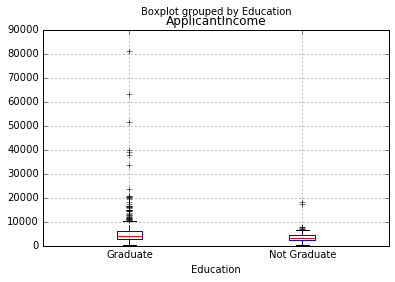

In [10]:
df.boxplot(column='ApplicantIncome', by='Education')

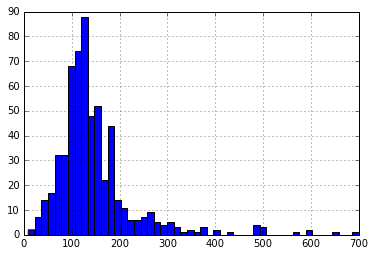

In [11]:
df['LoanAmount'].hist(bins=50)

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1183c4518>],
 'caps': [<matplotlib.lines.Line2D at 0x1183cdeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1183d7780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1183d0828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1183c4f28>,
  <matplotlib.lines.Line2D at 0x1183cd6a0>]}

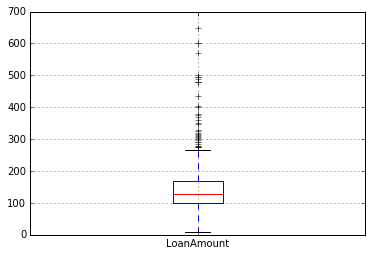

In [12]:
df.boxplot(column='LoanAmount')

In [13]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\nProbability of Getting a Loan for Each Credit History Class')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of Getting a Loan for Each Credit History Class
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


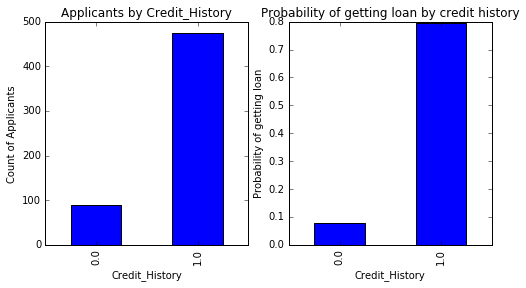

In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

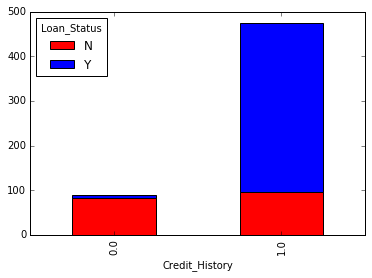

In [15]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [16]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df['Self_Employed'].fillna('No', inplace=True)

In [18]:
table=df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
#Define a function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]
#Fill in missing values using a categorically relevant median
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

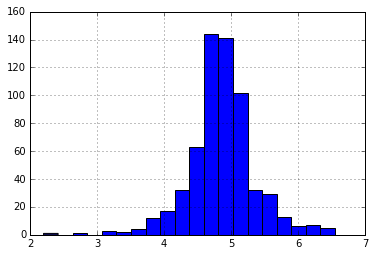

In [20]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

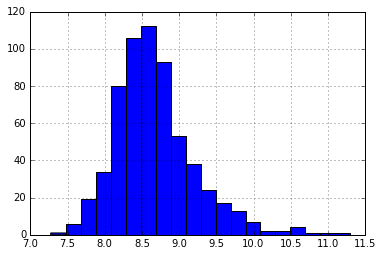

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [22]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
df['Married'].fillna('Yes', inplace=True)

In [25]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
df['Dependents'].fillna(0, inplace=True) # Clear majority of applicants have 0 dependents, so we'll fill using that

In [27]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
df[(df['Credit_History'].isnull())].describe()

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,50.000000,50.000000,50.000000,50.00000,0.0,50.000000,50.000000,50.000000
mean,4693.080000,2645.440000,160.460000,340.32000,NaN,4.934661,7338.520000,8.695967
std,3799.240605,5980.208095,106.608996,71.41641,NaN,0.505657,6678.526708,0.574761
min,416.000000,0.000000,58.000000,12.00000,NaN,4.060443,1880.000000,7.539027
25%,2675.000000,0.000000,99.250000,360.00000,NaN,4.597632,4217.000000,8.346827
50%,3644.000000,1583.500000,130.000000,360.00000,NaN,4.867534,5873.000000,8.677887
75%,5746.000000,2908.000000,184.250000,360.00000,NaN,5.216269,7356.250000,8.902857
max,20833.000000,41667.000000,650.000000,480.00000,NaN,6.476972,42083.000000,10.647399


In [29]:
df['LoanOverTotal'] = df['LoanAmount'] / df['TotalIncome']

In [30]:
df[(df['Credit_History'].isnull())].sort_values(by='Loan_Status')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,LoanOverTotal
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,NaN,Urban,N,5.857933,42083.0,10.647399,0.008317
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N,4.204693,6979.0,8.850661,0.009600
503,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N,4.927254,9352.0,9.143346,0.014756
449,LP002444,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,NaN,Semiurban,N,5.247024,4311.0,8.368925,0.044073
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N,5.204007,8649.0,9.065199,0.021043
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N,4.852030,4931.0,8.503297,0.025958
95,LP001326,Male,No,0,Graduate,No,6782,0.0,130.0,360.0,NaN,Urban,N,4.867534,6782.0,8.822027,0.019168
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,N,5.278115,11250.0,9.328123,0.017422
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N,5.579730,8250.0,9.017968,0.032121
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N,5.303305,7535.0,8.927314,0.026676


In [31]:
def fillCredit(x):
    if (x['LoanOverTotal'] > .025) | (x['TotalIncome'] > 5000):
        return 1
    else:
        return 0

df['Credit_History'].fillna(df[df['Credit_History'].isnull()].apply(fillCredit, axis=1), inplace=True)

In [32]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
LoanOverTotal         0
dtype: int64

In [33]:
print(df['Loan_Amount_Term'].mean())
print(df['Loan_Amount_Term'].median())

342.0
360.0


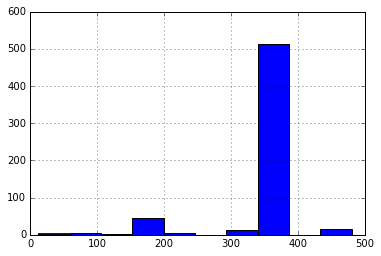

In [34]:
df['Loan_Amount_Term'].hist(bins=10)

In [35]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

In [36]:
df['Gender'].fillna('Male', inplace=True)

In [37]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
LoanOverTotal        0
dtype: int64

### Woohoo - I filled out an unfamiliar dataframe, replacing NaN values with reasonably well thought-out values. Now to build a model! 

In [38]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for item in var_mod:
    df[item] = le.fit_transform(df[item])

In [39]:
df.loc[df['Dependents'] == "3+", 'Dependents'] = 3

In [40]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

In [41]:
df.loc[df['Dependents'] == '0', 'Dependents'] = 0

### Ok, now I have all of the data in a numerical format that can be used in sklearn. I had to do some finagling of the Dependents column because it had string zero not int zero. It also had the string 3+ that I converted to simply 3.

In [42]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,LoanOverTotal
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026,0.022226
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,0.021015
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,0.022000
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,0.024287
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,0.023500
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,5.587249,9613.0,9.170872,0.027775
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,4.553877,3849.0,8.255569,0.024682
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,5.062595,5540.0,8.619750,0.028520
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,5.123964,5532.0,8.618305,0.030369
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,5.855072,23809.0,10.077819,0.014658


In [73]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
    #Fit the model
    model.fit(data[predictors], data[outcome])
    #make predictions on the training set
    predictions = model.predict(data[predictors])
    #print accuracy (This should be a really useful tutorial, since it seems to have everything neatly organized)
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error =[]
    for train, test in kf.split(data):
        #filter training data
        train_predictors = (data[predictors].ix[train,:])
        # The target we're using to train the algorithm.
        train_target = data[outcome].ix[train]
        #Training the algorithm using the predictors and target
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].ix[test,:], data[outcome].ix[test]))
    print("Cross-validation score: %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so it can be referred to outside the function
    model.fit(data[predictors], data[outcome])
    submission = pd.DataFrame({"Loan_ID": data["Loan_ID"], "Loan_Status": predictions})
    submission.to_csv('CN_Loan_Submission.csv', index=False)

In [44]:
outcome_var = "Loan_Status"
model = LogisticRegression()
predictor_var = ["Credit_History", "Education"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.130%
Cross-validation score: 80.132%


### This code was written for passing multiple predictors into the function, but the example only talks about using one predictor - "Credit_History". Adding another cleared up all the issues I had with the code. So, for now, I think it works. Moving on. Sheesh

In [45]:
predictor_var = ["Credit_History", "Education", "Married", "Property_Area"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.130%
Cross-validation score: 80.132%


In [46]:
predictor_var = ["Credit_History", "Education", "Married", "TotalIncome"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.130%
Cross-validation score: 79.807%


## Using a Decision Tree

In [47]:
model = DecisionTreeClassifier()
predictor_var = ["Credit_History","Gender", "Education", "Married"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.130%
Cross-validation score: 80.132%


In [48]:
predictor_var = ["Credit_History","Loan_Amount_Term", "LoanAmount_log"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 88.762%
Cross-validation score: 67.581%


### Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:
# Random Forest Time!

In [49]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ["Gender","Married","Dependents","Education","Self_Employed", "Credit_History","Loan_Amount_Term", "LoanAmount_log", "Property_Area", "TotalIncome_log"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 100.000%
Cross-validation score: 76.711%


#### Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:
<ol>
<li>Reducing the number of predictors</li>
<li>Tuning the model parameters</li>
</ol>

In [51]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

TotalIncome_log     0.275741
Credit_History      0.241005
LoanAmount_log      0.239863
Property_Area       0.052754
Dependents          0.052627
Loan_Amount_Term    0.046072
Education           0.025502
Married             0.025097
Gender              0.021034
Self_Employed       0.020306
dtype: float64


In [74]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Property_Area','Dependents']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 83.388%
Cross-validation score: 79.807%


### Really, the next step here is to do some feature engineering, and maybe evaluate some features for relevance. Notice that this result is only slightly better than the original logistic regression results. More complex is not always better. 

NameError: name 'predictions' is not defined